<center>

# <span style="color:red; font-size:70px;"> Modello di Ising 2D</span>

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<center>

# <span style="color:green; font-size:60px;"> Algoritmo di Metropolis</span>

</center>

<center>

<span style="color:blue; font-size:50px;"> Magnetizzazione</span>

</center>

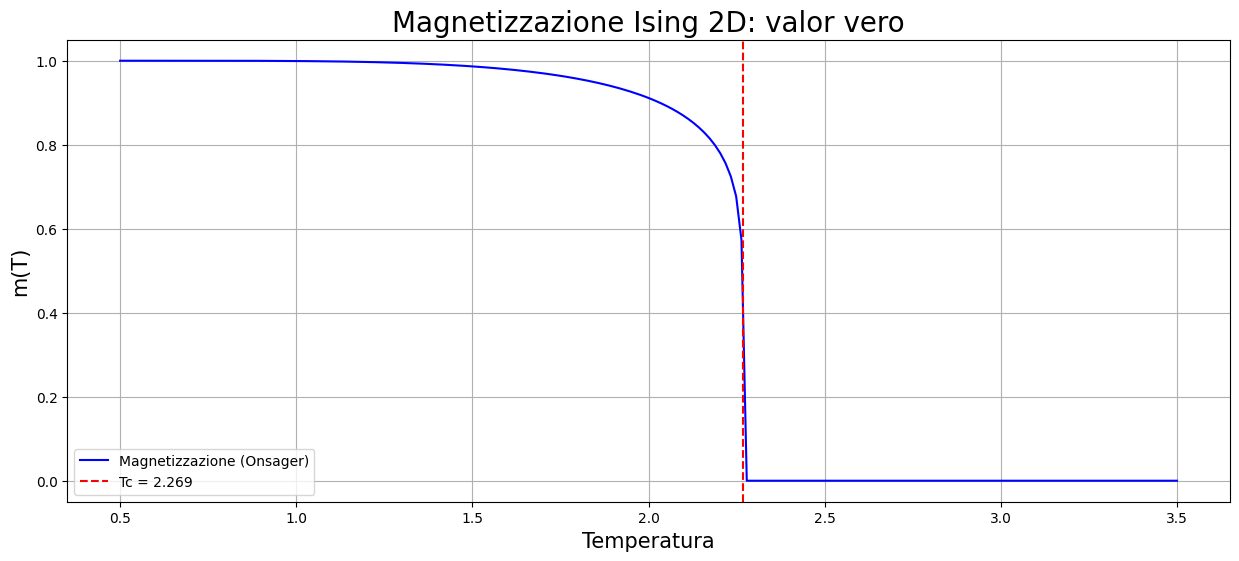

In [17]:
T = np.linspace(0.5, 3.5, 200)
T_c = 2.269 
J = 1  

# Funzione per calcolare la magnetizzazione (soluzione di Onsager)
def magnOnsager(T, J, Tc):

    if T > Tc:
        m = 0
    else:
        m = np.sinh(2*J/T)
        m = (1 - m**(-4))**(1/8)
    
    return m


# Calcolo della magnetizzazione per ogni temperatura
m = []
for t in T:
    m.append(magnOnsager(t, J, T_c))

# Creazione del grafico
plt.figure(figsize=(15, 6))
plt.plot(T, m, label=r'Magnetizzazione (Onsager)', color='b')
plt.axvline(x=T_c, color='r', linestyle='--', label=f'Tc = {T_c:.3f}')
plt.xlabel('Temperatura', fontsize = 15)
plt.ylabel('m(T)', fontsize = 15)
plt.title('Magnetizzazione Ising 2D: valor vero', fontsize = 20)
plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()